<a href="https://colab.research.google.com/github/manpriyad/Alt/blob/master/Missing_values_impute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imputing missing values using Logistic Regression and KNN 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt



In [ ]:
df_old=pd.read_csv('/content/titanic_train.csv')

In [ ]:
df=df_old.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.drop([ 'PassengerId', 'Name', 
              'Ticket', 'Cabin'], axis=1,inplace=True)

In [ ]:
cat_variables = df[['Sex', 'Embarked']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [ ]:
df = df.drop(['Sex', 'Embarked'], axis=1)
df = pd.concat([df, cat_dummies], axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.0,0.015713,1.0,0.0,1.0


In [ ]:
pd.DataFrame(df.corr())['Age']

Survived     -0.077221
Pclass       -0.369226
Age           1.000000
SibSp        -0.308247
Parch        -0.189119
Fare          0.096067
Sex_male      0.093254
Embarked_Q   -0.022405
Embarked_S   -0.032523
Name: Age, dtype: float64

In [ ]:
# 3 features more correlated with Age column : Pclass,SibSp,Parch

df1=df[['Pclass','SibSp','Parch','Age']]

In [ ]:
test_df_with_null=df1[df1['Age'].isnull()]
test_df_with_null

,Pclass,SibSp,Parch,Age
5,1.0,0.000,0.000000,NaN
17,0.5,0.000,0.000000,NaN
19,1.0,0.000,0.000000,NaN
26,1.0,0.000,0.000000,NaN
28,1.0,0.000,0.000000,NaN
...,...,...,...,...
859,1.0,0.000,0.000000,NaN
863,1.0,1.000,0.333333,NaN
868,1.0,0.000,0.000000,NaN
878,1.0,0.000,0.000000,NaN


In [ ]:
ytest=test_df_with_null['Age']
xtest=test_df_with_null.drop(['Age'],axis=1)

In [ ]:
train_df_without_null=df1.dropna()

In [ ]:
train_df_without_null

,Pclass,SibSp,Parch,Age
0,1.0,0.125,0.000000,0.271174
1,0.0,0.125,0.000000,0.472229
2,1.0,0.000,0.000000,0.321438
3,0.0,0.125,0.000000,0.434531
4,1.0,0.000,0.000000,0.434531
...,...,...,...,...
885,1.0,0.000,0.833333,0.484795
886,0.5,0.000,0.000000,0.334004
887,0.0,0.000,0.000000,0.233476
889,0.0,0.000,0.000000,0.321438


In [ ]:
ytrain=train_df_without_null['Age']
xtrain=train_df_without_null.drop(['Age'],axis=1)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ypred=lr.predict(xtest)

In [ ]:
ypred

array([ 0.34283879,  0.41907556,  0.34283879,  0.34283879,  0.34283879,
        0.34283879,  0.44567927,  0.34283879,  0.34283879,  0.34283879,
        0.34283879,  0.29320573,  0.34283879,  0.24357268,  0.49531232,
        0.49531232,  0.27542989,  0.34283879,  0.34283879,  0.34283879,
        0.34283879,  0.34283879,  0.34283879,  0.34283879,  0.29320573,
        0.34283879,  0.34283879,  0.27542989,  0.3072871 ,  0.34283879,
        0.34283879, -0.08977734,  0.47753648,  0.49531232,  0.17616378,
       -0.08977734,  0.41907556,  0.49531232,  0.29320573,  0.34283879,
        0.34283879, -0.08977734,  0.29320573,  0.34283879,  0.17616378,
        0.34283879,  0.29320573,  0.29320573,  0.34283879,  0.49531232,
        0.34283879,  0.34283879,  0.49531232,  0.34283879,  0.41907556,
        0.49531232,  0.49531232,  0.49531232,  0.34283879,  0.24357268,
        0.41907556,  0.34283879,  0.49531232, -0.08977734,  0.24357268,
        0.44567927,  0.34283879,  0.29320573,  0.49531232,  0.34

In [ ]:
df.loc[df.Age.isnull(),'Age']=ypred

In [ ]:
df['Age'].head(10)

0    0.271174
1    0.472229
2    0.321438
3    0.434531
4    0.434531
5    0.342839
6    0.673285
7    0.019854
8    0.334004
9    0.170646
Name: Age, dtype: float64

In [ ]:
df['Age'].isna().sum()

0

In [ ]:
df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0,0.0


In [ ]:
df_knn=df_old.copy()

In [ ]:
df_knn.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_knn.drop([ 'PassengerId', 'Name', 
              'Ticket', 'Cabin'], axis=1,inplace=True)

In [ ]:
df_knn.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
cat_variables = df_knn[['Sex', 'Embarked']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [ ]:
df_knn = df_knn.drop(['Sex', 'Embarked'], axis=1)
df_knn = pd.concat([df_knn, cat_dummies], axis=1)
df_knn.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)
df_knn.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.0,0.015713,1.0,0.0,1.0


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_knn = pd.DataFrame(imputer.fit_transform(df_knn),columns = df_knn.columns)


In [ ]:
df_knn['Age']

0      0.271174
1      0.472229
2      0.321438
3      0.434531
4      0.434531
         ...   
886    0.334004
887    0.233476
888    0.273687
889    0.321438
890    0.396833
Name: Age, Length: 891, dtype: float64

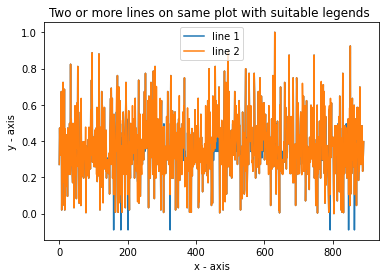

In [ ]:
# line 1 points
# x1 = [10,20,30]
x1=df['Age']
# plotting the line 1 points 
plt.plot(x1, label = "line 1")
# line 2 points
# x2 = [20,30,40]
x2=df_knn['Age']
# plotting the line 2 points 
plt.plot(x2, label = "line 2")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [ ]:
df_test=pd.DataFrame()

In [ ]:
df_test['LR']=df['Age']
df_test['KNN']=df_knn['Age']

In [ ]:
df_test[df_test['LR']!=df_test['KNN']]

,LR,KNN
5,0.342839,0.595376
17,0.419076,0.467203
19,0.342839,0.148027
26,0.342839,0.406886
28,0.342839,0.215883
...,...,...
859,0.342839,0.318924
863,-0.089777,0.105303
868,0.342839,0.308872
878,0.342839,0.301332


In [ ]:
df_test['LR'].mean()

0.36280406153208294

In [ ]:
df_test['KNN'].mean()

0.36961328117397496

In [ ]:
df_test['original']=df_old['Age']

In [ ]:
df_test.to_csv('check.csv')

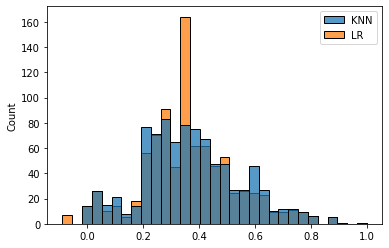

In [ ]:
sns.histplot(data=df_test[['KNN','LR']])

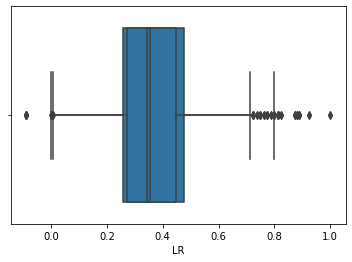

In [ ]:
sns.boxplot(data=df_test,x='KNN')
sns.boxplot(data=df_test,x='LR')

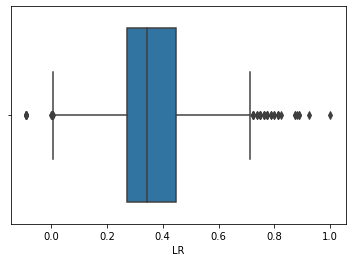

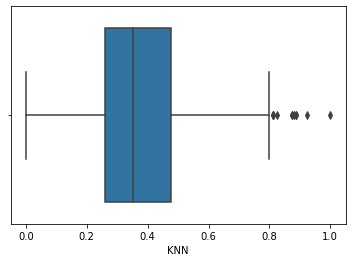

In [ ]:
# Create data and labels first
# df_test[['LR','KNN']]

# Plot data and labels
sns.boxplot(data=df_test,x='LR')
plt.show()
sns.boxplot(data=df_test,x='KNN')


In [ ]:
df_test[['LR','KNN']].describe()

,LR,KNN
count,891.000000,891.000000
mean,0.362804,0.369613
std,0.171089,0.177302
min,-0.089777,0.000000
25%,0.271174,0.258608
50%,0.342839,0.352852
75%,0.447097,0.477256
max,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


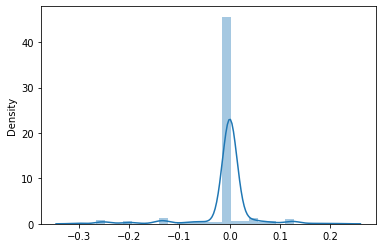

In [ ]:
import seaborn as sns
sns.distplot(df_test['LR']-df_test['KNN'])

Above graph shows that the difference between prediction using KNN and predictions using LR is min and their distributions show normal distribution with closed range (-0.2to +0.2)